In [1]:
library("DESeq2")
library("geneplotter")
library("ggplot2")
library("vsn")
library("genefilter")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

In [2]:
setwd("/home/gstupp/projects/Wolan/ana_extractions/analysis/analysis_deseq")

In [3]:
file_path = "X.csv"
countData = read.csv(file_path, row.names = 1)

In [4]:
meta_path = "metadata.csv"
sampleTable = read.csv(meta_path, row.names = 1)
sampleTable = sampleTable[colnames(countData),]
sampleTable$cell = factor(sampleTable$cell)
sampleTable$method = factor(sampleTable$method)
sampleTable$method <- relevel(sampleTable$method, ref="sonic")
sampleTable = sampleTable[!(rownames(sampleTable) %in% c("PA_pellet_1", "PA_pellet_2", "PA_pellet_3")),]
sampleTable

,cell,file,method,name.1,pretty_name
BS_sonic_1,BS,data/BS/Sonic/BS sonic 1.txt,sonic,BS_sonic_1,BS sonic 1
BS_sonic_2,BS,data/BS/Sonic/BS sonic 2.txt,sonic,BS_sonic_2,BS sonic 2
BS_sonic_3,BS,data/BS/Sonic/BS sonic 3.txt,sonic,BS_sonic_3,BS sonic 3
BS_triflic_1,BS,data/BS/Triflic/BS triflic 1.txt,triflic,BS_triflic_1,BS triflic 1
BS_triflic_2,BS,data/BS/Triflic/BS triflic 2.txt,triflic,BS_triflic_2,BS triflic 2
BS_triflic_3,BS,data/BS/Triflic/BS triflic 3.txt,triflic,BS_triflic_3,BS triflic 3
Jurkat_sonic_1,Jurkat,data/Jurkat/Sonic/Jurkat sonic 1.txt,sonic,Jurkat_sonic_1,Jurkat sonic 1
Jurkat_sonic_2,Jurkat,data/Jurkat/Sonic/Jurkat sonic 2.txt,sonic,Jurkat_sonic_2,Jurkat sonic 2
Jurkat_sonic_3,Jurkat,data/Jurkat/Sonic/Jurkat sonic 3.txt,sonic,Jurkat_sonic_3,Jurkat sonic 3
Jurkat_triflic_1,Jurkat,data/Jurkat/Triflic/Jurkat triflic 1.txt,triflic,Jurkat_triflic_1,Jurkat triflic 1


## BS

In [22]:
sampleTableX = sampleTable[sampleTable$cell=="BS",]
X = countData[,sampleTableX$name]
X = X[ !apply(X, 1, function(x) all(is.na(x))), ]
X[is.na(X)] = 0
dds = DESeqDataSetFromMatrix(X, colData = sampleTableX, design = ~ method)
dds <- dds[ rowSums(counts(dds)) > 1, ]
counts(dds)[0:2,]

converting counts to integer mode
factor levels were dropped which had no samples


,BS_sonic_1,BS_sonic_2,BS_sonic_3,BS_triflic_1,BS_triflic_2,BS_triflic_3
C0H3V2,4,7,5,0,3,4
C0H3V3,6,6,9,0,0,0


In [23]:
dds = DESeq(dds)
res = results(dds, alpha=0.1)
summary(res)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing



out of 1490 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 262, 18% 
LFC < 0 (down)   : 224, 15% 
outliers [1]     : 0, 0% 
low counts [2]   : 405, 27% 
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [24]:
res = results(dds)
resOrdered = res[order(res$padj),]
write.csv(as.data.frame(resOrdered),file="BS_deseq_results.csv")
resOrdered[0:20,]

log2 fold change (MLE): method triflic vs sonic 
Wald test p-value: method triflic vs sonic 
DataFrame with 20 rows and 6 columns
        baseMean log2FoldChange     lfcSE      stat       pvalue         padj
       <numeric>      <numeric> <numeric> <numeric>    <numeric>    <numeric>
P80239  747.5681      -4.366531 0.2987603 -14.61550 2.237076e-48 2.427227e-45
P54375  329.4090       5.712131 0.4305659  13.26656 3.617905e-40 1.962714e-37
P0CI73  174.4533       5.838119 0.4605166  12.67733 7.898064e-37 2.856466e-34
P26901  280.4514      -3.304182 0.2784145 -11.86785 1.738711e-32 4.716255e-30
P94391  180.9387      -4.242990 0.3594748 -11.80330 3.752858e-32 8.143702e-30
...          ...            ...       ...       ...          ...          ...
P94550  47.60762      -4.011826 0.5316913 -7.545406 4.508816e-14 3.057541e-12
P54542  59.62276      -3.447173 0.4605396 -7.485073 7.150748e-14 4.563860e-12
P45745  61.68154       9.307485 1.2457819  7.471200 7.946694e-14 4.655448e-12
P54716  48.0

In [25]:
sizeFactors(dds)

BS_sonic_1   BS_sonic_2   BS_sonic_3 BS_triflic_1 BS_triflic_2 BS_triflic_3 
   0.9845253    0.9086815    0.9433868    0.8298068    1.0597155    1.3676984

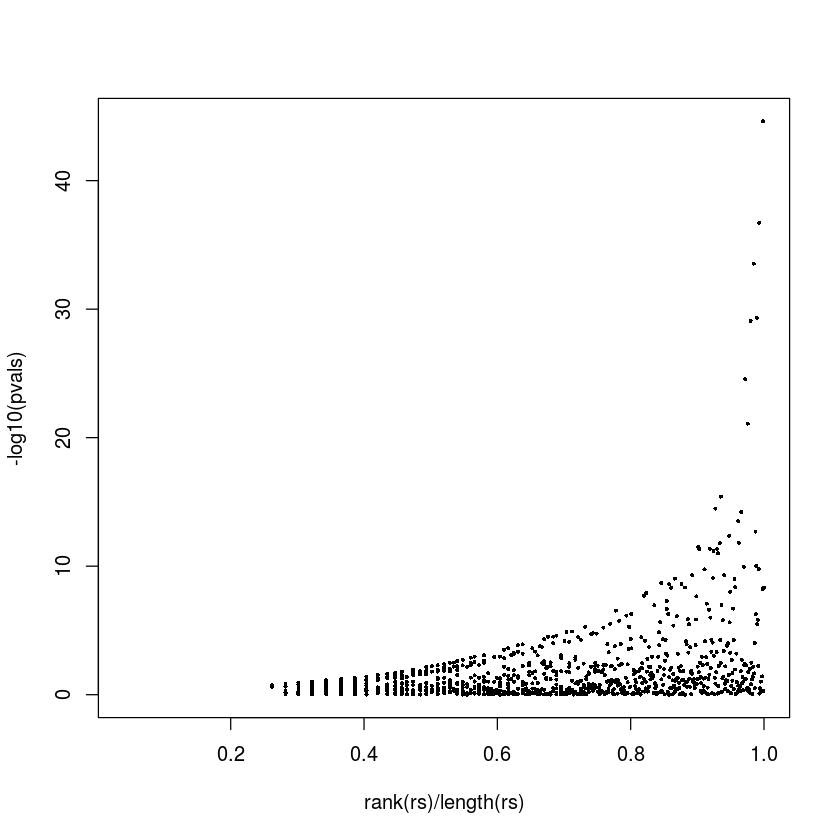

In [26]:
rs = rowSums ( counts ( dds ))
pvals = res$padj
plot(rank(rs)/length(rs), -log10(pvals), pch=16, cex=0.45)

## PA

In [9]:
sampleTableX = sampleTable[sampleTable$cell=="PA",]
X = countData[,sampleTableX$name]
X = X[ !apply(X, 1, function(x) all(is.na(x))), ]
X[is.na(X)] = 0
dds = DESeqDataSetFromMatrix(X, colData = sampleTableX, design = ~ method)
dds <- dds[ rowSums(counts(dds)) > 1, ]
counts(dds)[0:2,]

converting counts to integer mode
factor levels were dropped which had no samples


,PA_sonic_1,PA_sonic_2,PA_sonic_3,PA_triflic_1,PA_triflic_2,PA_triflic_3
E1JGJ8,7,2,0,0,0,0
G3XCT6,37,12,6,13,35,18


In [10]:
dds = DESeq(dds)
res = results(dds, alpha=0.05)
summary(res)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing



out of 2054 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 65, 3.2% 
LFC < 0 (down)   : 19, 0.93% 
outliers [1]     : 0, 0% 
low counts [2]   : 1035, 50% 
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [11]:
res = results(dds)
resOrdered = res[order(res$padj),]
write.csv(as.data.frame(resOrdered),file="PA_deseq_results.csv")
resOrdered[0:20,]

log2 fold change (MLE): method triflic vs sonic 
Wald test p-value: method triflic vs sonic 
DataFrame with 20 rows and 6 columns
         baseMean log2FoldChange     lfcSE      stat       pvalue         padj
        <numeric>      <numeric> <numeric> <numeric>    <numeric>    <numeric>
Q9HWW1  556.09650       5.233439 0.5091475 10.278826 8.779037e-25 9.990544e-22
P13794  546.29212       7.082617 0.7110107  9.961336 2.250193e-23 1.280360e-20
Q9HVI2  301.44015      11.803712 1.3073297  9.028872 1.734509e-19 6.579571e-17
Q9HUM0  147.19566       7.388026 0.8303333  8.897664 5.703441e-19 1.622629e-16
Q9I4S1   49.57822       6.486842 0.9827596  6.600640 4.093863e-11 9.317632e-09
...           ...            ...       ...       ...          ...          ...
P25254   9.496732       6.818539 1.5720935  4.337235 1.442861e-05  0.001026235
O82851 228.254988       2.531165 0.5983835  4.230005 2.336861e-05  0.001564322
Q9HU56 118.489780       2.949751 0.7092333  4.159070 3.195454e-05  0.002020237
P

In [12]:
sizeFactors(dds)

PA_sonic_1   PA_sonic_2   PA_sonic_3 PA_triflic_1 PA_triflic_2 PA_triflic_3 
   1.5223905    1.1269415    0.7568628    0.7447950    1.0712960    1.0596022

## Jurkat

In [13]:
sampleTableX = sampleTable[sampleTable$cell=="Jurkat",]
X = countData[,sampleTableX$name]
X = X[ !apply(X, 1, function(x) all(is.na(x))), ]
X[is.na(X)] = 0
dds = DESeqDataSetFromMatrix(X, colData = sampleTableX, design = ~ method)
dds <- dds[ rowSums(counts(dds)) > 1, ]
counts(dds)[0:2,]

converting counts to integer mode
factor levels were dropped which had no samples


,Jurkat_sonic_1,Jurkat_sonic_2,Jurkat_sonic_3,Jurkat_triflic_1,Jurkat_triflic_2,Jurkat_triflic_3
A0A024QZP7,0,0,6,0,0,0
A0A024R571,4,6,6,6,5,2


In [14]:
dds = DESeq(dds)
res = results(dds, alpha=0.05)
summary(res)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing



out of 3762 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 1, 0.027% 
LFC < 0 (down)   : 3, 0.08% 
outliers [1]     : 21, 0.56% 
low counts [2]   : 0, 0% 
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [15]:
res = results(dds)
resOrdered = res[order(res$padj),]
write.csv(as.data.frame(resOrdered),file="Jurkat_deseq_results.csv")
resOrdered[0:20,]

log2 fold change (MLE): method triflic vs sonic 
Wald test p-value: method triflic vs sonic 
DataFrame with 20 rows and 6 columns
         baseMean log2FoldChange     lfcSE      stat       pvalue         padj
        <numeric>      <numeric> <numeric> <numeric>    <numeric>    <numeric>
Q7L7L0   14.96284      21.119766  2.639980  7.999971 1.244482e-15 7.529118e-13
Q9BVA1  104.95902      -9.760905  1.898270 -5.142000 2.718287e-07 8.222820e-05
E9PQB7   66.68883      -9.106470  1.966888 -4.629888 3.658638e-06 7.378254e-04
P04075   44.71724      -8.529565  1.920428 -4.441493 8.933700e-06 1.351222e-03
F5GWF6   12.16857       7.478029  1.995229  3.747955 1.782824e-04 1.797681e-02
...           ...            ...       ...       ...          ...          ...
M0R2I7  25.463798       4.306838  1.497472  2.876073  0.004026561    0.1595409
Q02750   7.892063      -6.023802  2.114809 -2.848391  0.004394092    0.1595409
Q13011   7.205527      -5.894681  2.093613 -2.815555  0.004869311    0.1636629
E

In [16]:
sizeFactors(dds)

Jurkat_sonic_1   Jurkat_sonic_2   Jurkat_sonic_3 Jurkat_triflic_1 
       1.6506211        1.0533018        1.4050584        0.7140481 
Jurkat_triflic_2 Jurkat_triflic_3 
       0.6905997        0.8915540